## Support Vector Machines

In [1]:
# Import libraries
import os
import numpy as np
import scipy as sp
import scipy.io
from scipy.optimize import minimize
import re
import nltk
from nltk import word_tokenize
from sklearn import svm #SVM software
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC # based on libsvm; see http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
%matplotlib inline  

# 1 Support Vector Machines

In [2]:
# Load Data
dataset_1 = scipy.io.loadmat('/Users/wiseer85/Documents/Data Science/ML Exercises/data/ex6data1.mat')
dataset_2 = scipy.io.loadmat('/Users/wiseer85/Documents/Data Science/ML Exercises/data/ex6data2.mat')
dataset_3 = scipy.io.loadmat('/Users/wiseer85/Documents/Data Science/ML Exercises/data/ex6data3.mat')

## 1.1 Example dataset 1

In [3]:
# Training Set
X_1 = dataset_1['X']
y_1 = dataset_1['y'].reshape(-1)

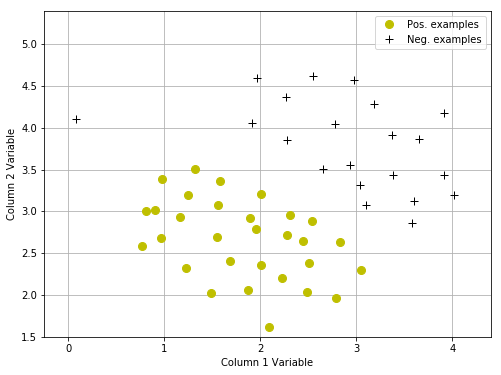

In [4]:
# Plot Data
def plotData():
    plt.figure(figsize=(8, 6))
    plt.plot(X_1[y_1 == 0].T[0], X_1[y_1 == 0].T[1], 'yo', ms=8, label='Pos. examples')
    plt.plot(X_1[y_1 == 1].T[0], X_1[y_1 == 1].T[1], 'k+', ms=8, label='Neg. examples')
    plt.legend(numpoints = 1, loc = 1)
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.xlim(-0.25, 4.4)
    plt.ylim(1.5, 5.4)
    plt.grid(True)

plotData()

In [5]:
# Fit SVM with linear kernal (C=1) 
clf = SVC(C=1, kernel='linear')
clf.fit(X_1, y_1) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# Calculate the decision boundary
xs = sp.linspace(-1, 8)
b = clf.intercept_[0]
w_0 = clf.coef_[0, 0]
w_1 = clf.coef_[0, 1]
a = - w_0 / w_1
db_1 = a * xs - b / w_1

# Store support vectors
svs = clf.support_vectors_

# Calculate margins
c = svs[0]
margin_low = a * (xs - c[0]) + c[1] 
c = svs[-2]
margin_high = a * (xs - c[0]) + c[1]

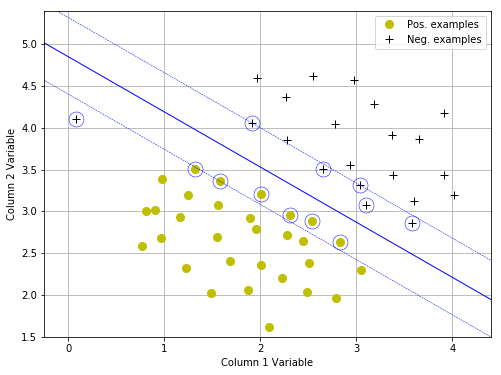

In [7]:
# Define SVM boundary
def plotBoundary():
    plt.plot(xs, db_1, 'b-', lw=1, label='Decision boundary')
    plt.plot(xs, margin_low, 'b--', lw=0.5, label='Margin')
    plt.plot(xs, margin_high, 'b--', lw=0.5)
    plt.plot(svs.T[0], svs.T[1], marker='o', ls='none', ms=15, mfc='none', mec='b', mew=0.5, label='Support vectors')

plotData()
plotBoundary()

In [8]:
# Fit SVM with linear kernal (C=100) 
clf = SVC(C=100, kernel='linear')
clf.fit(X_1, y_1) 

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
# Calculate the decision boundary
xs = sp.linspace(-1, 8)
b = clf.intercept_[0]
w_0 = clf.coef_[0, 0]
w_1 = clf.coef_[0, 1]
a = - w_0 / w_1
db_1 = a * xs - b / w_1

# Store support vectors
svs = clf.support_vectors_

# Calculate margins
c = svs[0]
margin_low = a * (xs - c[0]) + c[1]
c = svs[-2]
margin_high = a * (xs - c[0]) + c[1]

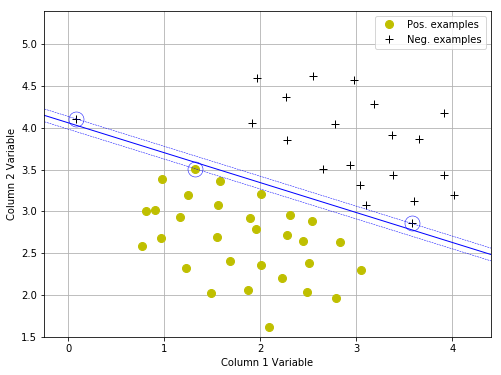

In [10]:
plotData()
plt.xlim(-0.25, 4.4)
plt.ylim(1.5, 5.4)
plotBoundary()

## 1.2 SVM with Gaussian kernels

### 1.2.2 Example dataset 2

In [11]:
# Training Set
X_2 = dataset_2['X']
y_2 = dataset_2['y'].reshape(-1)

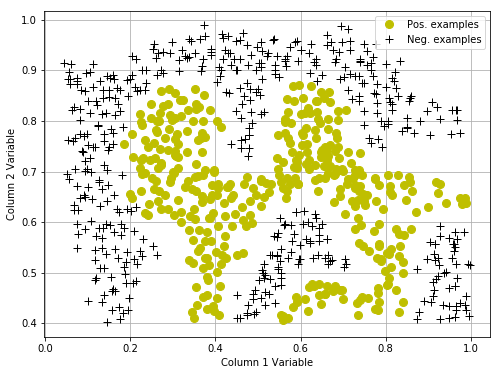

In [12]:
# Plot Data
def plotData():
    plt.figure(figsize=(8, 6))
    plt.plot(X_2[y_2 == 0].T[0], X_2[y_2 == 0].T[1], 'yo', ms=8, label='Pos. examples')
    plt.plot(X_2[y_2 == 1].T[0], X_2[y_2 == 1].T[1], 'k+', ms=8, label='Neg. examples')
    plt.legend(numpoints = 1, loc = 1)
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.grid(True)

plotData()

In [13]:
# Define Gaussian kernal
def gaussKernel(x1, x2, sigma):
    sigmasquared = np.power(sigma,2)
    return np.exp(-(x1-x2).T.dot(x1-x2)/(2*sigmasquared))

print(gaussKernel(np.array([1, 2, 1]),np.array([0, 4, -1]), 2.))

0.32465246735834974


In [14]:
# Train the SVM with the Gaussian kernel on this dataset.
sigma = 0.1
gamma = np.power(sigma,-2.)
gaus_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gaus_svm.fit(X_2, y_2.flatten() )

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=99.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
# Fit SVM with the Gaussian kernel
sigma = 0.1
gamma = 1 / 2 / sigma**2
clf = SVC(C=1, gamma=gamma, kernel='rbf')
clf.fit(X_2, y_2) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [16]:
# Calculate Decision Boundary
x_0_pts, x_1_pts = sp.linspace(0, 1, 500), sp.linspace(0, 1, 500)
x_0_pts_mesh, x_1_pts_mesh = sp.meshgrid(x_0_pts, x_1_pts)
z = clf.predict(sp.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T).reshape(x_0_pts_mesh.shape)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


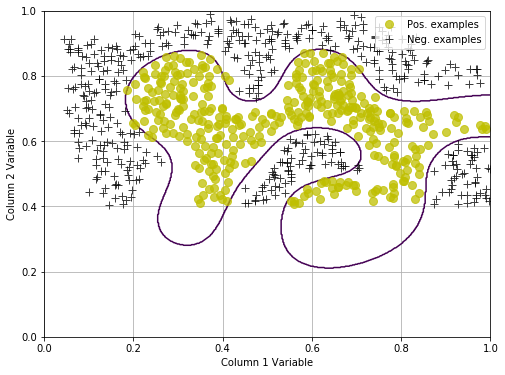

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(X_2[y_2 == 0].T[0], X_2[y_2 == 0].T[1], 'yo', ms=8, alpha=0.75, label='Pos. examples')
plt.plot(X_2[y_2 == 1].T[0], X_2[y_2 == 1].T[1], 'k+', ms=8, alpha=0.75, label='Neg. examples')
plt.contour(x_0_pts, x_1_pts, z, [0])
plt.legend(numpoints = 1, loc = 1)
plt.xlabel('Column 1 Variable')
plt.ylabel('Column 2 Variable')
plt.grid(True)

### 1.2.3 Example dataset 3

In [19]:
# Training Set
X_3 = dataset_3['X']
y_3 = dataset_3['y'].reshape(-1)

X_val_3 = dataset_3['Xval']
y_val_3 = dataset_3['yval']

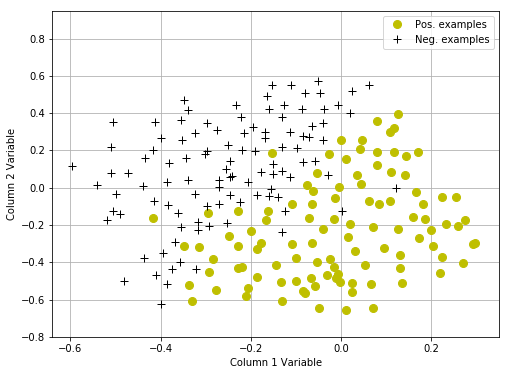

In [20]:
# Plot Data
def plotData():
    plt.figure(figsize=(8, 6))
    plt.plot(X_3[y_3 == 0].T[0], X_3[y_3 == 0].T[1], 'yo', ms=8, label='Pos. examples')
    plt.plot(X_3[y_3 == 1].T[0], X_3[y_3 == 1].T[1], 'k+', ms=8, label='Neg. examples')
    plt.xlim(-0.64, 0.35)
    plt.ylim(-0.8, 0.95)
    plt.legend(numpoints = 1, loc = 1)
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.grid(True)

plotData()

In [21]:
# Use cross validation set to determine best C and parameter to use
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C_pts_mesh, sigma_pts_mesh = sp.meshgrid(vals, vals)
scores = sp.vstack((C_pts_mesh.ravel(), sigma_pts_mesh.ravel(), sp.zeros(len(vals)**2))).T
for i, (C, sigma) in enumerate(scores[:, :2]):
    gamma = 1 / 2 / sigma**2
    clf = SVC(C=C, gamma=gamma, kernel='rbf')
    clf.fit(X_3, y_3)
    scores[i, 2] = clf.score(X_val_3, y_val_3)

In [22]:
# Fit model using optimized parameters
highest_acc_index = scores[:, 2].argmax()
C, sigma = scores[highest_acc_index][:2]
gamma = 1 / 2 / sigma**2
clf = SVC(C=C, gamma=gamma, kernel='rbf')
clf.fit(X_3, y_3)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
# Calculate Decision Boundary
x_0_pts, x_1_pts = sp.linspace(-0.64, 0.35, 500), sp.linspace(-0.8, 0.65, 500)
x_0_pts_mesh, x_1_pts_mesh = sp.meshgrid(x_0_pts, x_1_pts)
z = clf.predict(sp.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T).reshape(x_0_pts_mesh.shape)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


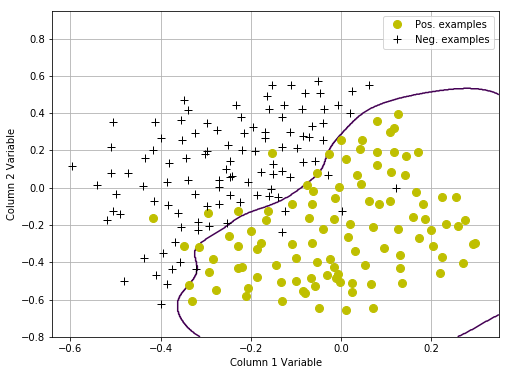

In [24]:
# Plot Decision Boundary
plotData()
plt.contour(x_0_pts, x_1_pts, z, [0])